In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_45600_R')

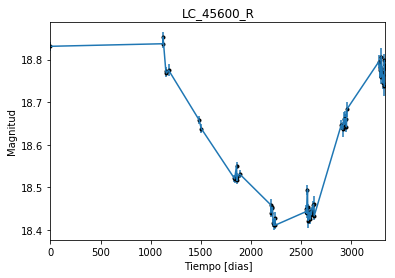

In [2]:
data = np.genfromtxt('LC_45600_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_45600_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

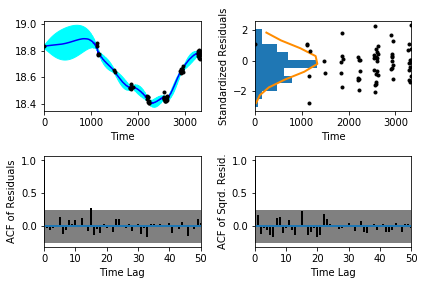

In [5]:
sample.assess_fit()

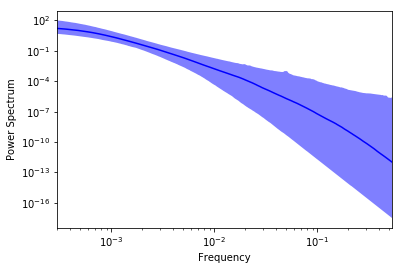

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_45600_R')

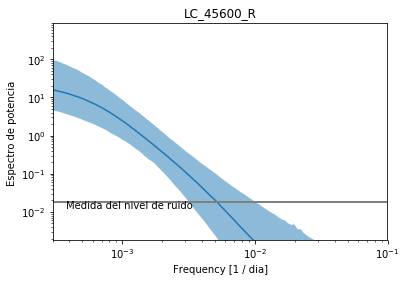

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_45600_R')

Text(0.5,1,'Prediccion , valor esperado LC_45600_R')

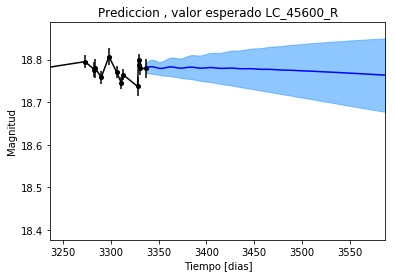

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_45600_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_45600_R')

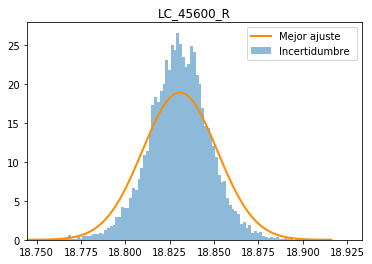

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_45600_R')

Text(0.5,1,'Interpolacion, camino simulado LC_45600_R')

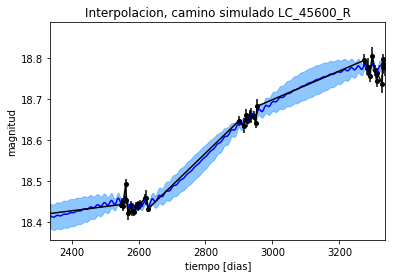

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_45600_R')

Text(0.5,1,'Interpolacion, camino simulado LC_45600_R')

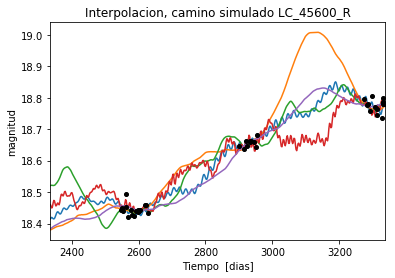

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_45600_R')

In [13]:
sample.parameters


['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 483.886675794
Median: 0.0167276079015
Standard deviation: 0.2217704896
68% credibility interval: [ 0.00094849  0.24509207]
95% credibility interval: [  3.54433783e-04   8.59213063e-01]
99% credibility interval: [  3.11350053e-04   1.00022997e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 353.974045001
Median: 0.00123494267998
Standard deviation: 0.054203302417
68% credibility interval: [ 0.00039767  0.02127752]
95% credibility interval: [ 0.0003128   0.18868005]
99% credibility interval: [  3.02354318e-04   3.78229029e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 498.765496592
Median: 0.0136560151425
Standard dev

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 493.247652513
Median: 170.960528966
Standard deviation: 2.10877018324
68% credibility interval: [ 169.09098325  172.91107894]
95% credibility interval: [ 166.55281712  175.389255  ]
99% credibility interval: [ 164.56987532  176.2156955 ]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 335.726074471
Median: 0.477699651507
Standard deviation: 2.38929169106
68% credibility interval: [ 0.03212276  4.02225792]
95% credibility interval: [ 0.01078318  8.42470157]
99% credibility interval: [  8.33190756e-03   1.11308501e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 425.092900764
Median: 0.429432564834
Standard deviation: 9.22854145069
68% credibility interval: [ 0.02093343  9.56454439]
95% credibility interval: [  2.4

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1225.63878528
Median: 3.90154424147e-21
Standard deviation: 8.1227111135e+21
68% credibility interval: [  3.14965634e-45   3.12887686e-02]
95% credibility interval: [  8.18262779e-63   1.26069233e+02]
99% credibility interval: [  5.48056598e-70   2.49259712e+04]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1067.25675782
Median: 18.6981102652
Standard deviation: 0.10421433785
68% credibility interval: [ 18.61331876  18.78828164]
95% credibility interval: [ 18.50343999  18.9104986 ]
99% credibility interval: [ 18.40004431  19.04315256]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 340.578772199
Median: 0.0154105364968
Standard deviation: 0.247867305409
68% credibility interval: [ 0.          0.30027635]
95% credibility interval: [ 0.          0.94653916]
99% credibility interval: [ 0.          1.02486892]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 340.578772199
Median: 0.0154105364968
Standard deviation: 0.247867305409
68% credibility interval: [ 0.          0.30027635]
95% credibility interval: [ 0.          0.94653916]
99% credibility interval: [ 0.          1.02486892]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 622.252380671
Median: 0.0
Standard deviation: 0.000161745463064
68% cr

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 493.247652513
Median: 170.960528966
Standard deviation: 2.10877018324
68% credibility interval: [ 169.09098325  172.91107894]
95% credibility interval: [ 166.55281712  175.389255  ]
99% credibility interval: [ 164.56987532  176.2156955 ]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1762.0217264
Median: 0.0267016286819
Standard deviation: 0.0412543228034
68% credibility interval: [ 0.01418693  0.0599503 ]
95% credibility interval: [ 0.00887479  0.15032176]
99% credibility interval: [ 0.00687817  0.26135437]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 525.089507706
Median: 1.24918495677
Standard deviation: 0.234616102565
68% credibility interval: [ 1.01092335  1.50449293]
95% credibility interval: [ 0.85636201  1.75004223]
99% credibility interval: [ 0.78176475  1.88302183]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 426.343738617
Median: 6.81177077995e-05
Standard deviation: 0.0331566690677
68% credibility interval: [  2.18031129e-06   2.36973115e-03]
95% credibility interval: [  1.40241878e-07   5.56126778e-02]
99% credibility interval: [  9.69205039e-10   2.74658463e-01]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 483.886675794
Median: (-0.105102660191-1.26874248762j)
Standard deviation: 2.08976468009
68% credibility interval: [-1.53995890-3.3118486j  -0.00595952-0.19281396j]
95% credibility interval: [ -5.39859490e+00+0.j          -2.22697314e-03-0.59401306j]
99% credibility interval: [ -6.28463026e+00+0.j          -1.95627008e-03-0.10543066j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 353.974045001
Median: (-0.00775937370206+0.13393206585j)
Standard deviation: 1.59419900615
68% credibility interval: [-0.13369058+0.18267515j -0.00249860+0.j        ]
95% credibility interval: [-1.18551170+2.49519599j -0.00196538+0.10670647j]
99% credibility interval: [ -2.37648308e+00+3.68662821j  -1.89974821e-03+0.j        ]
Posterior summ